170104016_exp_03

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
test_data =pd.read_csv('/content/gdrive/MyDrive/softcom_assignment2/Dataset_2/Dataset_2/verification_test.csv')
train_data = pd.read_csv('/content/gdrive/MyDrive/softcom_assignment2/Dataset_2/Dataset_2/verification_train.csv')

In [ ]:
test_label=test_data['label']

train_label=train_data['label']
data_names=[test_label,train_label]
all_labels=pd.concat(data_names,ignore_index=True)

In [ ]:
data_name=[test_data,train_data]
all_image=pd.concat(data_name,ignore_index=True)
all_image=all_image.drop(labels='label',axis=1)

print(all_image.shape)


(70000, 784)


In [ ]:
all_image=all_image/255.0
all_image=all_image.values.reshape(-1,28,28)

0


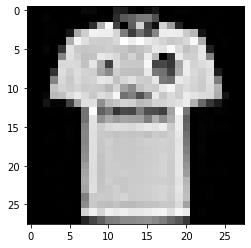

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

show_img = all_image[0].reshape(28, 28)
plt.imshow(show_img, cmap='gray')

print(all_labels[0])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_image, all_labels, test_size=0.2)

In [ ]:
train_dataset = list(zip(X_train,y_train))
test_dataset = list(zip(X_test,y_test))

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200
output_dim = 10
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
      
        self.linear_1 = nn.Linear(input_size, num_hidden)
       
        self.relu_1 = nn.ReLU()

        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
       
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(num_hidden, num_hidden)
      
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
         
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        
        self.relu_5= nn.ReLU()
 
         
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)

        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = 128)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
             
 
            # Print Loss
            iteration_loss.append(loss.item())
        
           
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.7960904240608215. Accuracy: 60.042857142857144
Iteration: 1000. Loss: 1.0321934223175049. Accuracy: 63.5
Iteration: 1500. Loss: 0.6827553510665894. Accuracy: 70.27142857142857
Iteration: 2000. Loss: 0.5124462842941284. Accuracy: 66.81428571428572
Iteration: 2500. Loss: 1.1193963289260864. Accuracy: 67.92142857142858
Iteration: 3000. Loss: 0.4922482371330261. Accuracy: 71.48571428571428
Iteration: 3500. Loss: 1.294851303100586. Accuracy: 73.45714285714286
Iteration: 4000. Loss: 1.0517929792404175. Accuracy: 74.68571428571428
Iteration: 4500. Loss: 0.7442554235458374. Accuracy: 77.47142857142858
Iteration: 5000. Loss: 0.7138657569885254. Accuracy: 78.73571428571428
Iteration: 5500. Loss: 1.024087905883789. Accuracy: 69.7
Iteration: 6000. Loss: 1.1097242832183838. Accuracy: 75.75714285714285
Iteration: 6500. Loss: 0.48004859685897827. Accuracy: 75.61428571428571
Iteration: 7000. Loss: 0.7450129389762878. Accuracy: 77.20714285714286
Iteration: 7500. Loss: 0.92354613

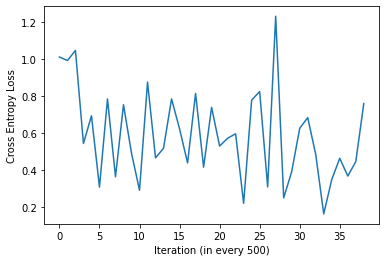

In [ ]:
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

170104016_exp_03_01

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 100
num_iters = 30000
input_dim = 28*28 # num_features = 784
num_hidden = 200
output_dim = 10
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
      
        self.linear_1 = nn.Linear(input_size, num_hidden)
       
        self.relu_1 = nn.ReLU()

        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
       
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(num_hidden, num_hidden)
      
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
         
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        
        self.relu_5= nn.ReLU()
 
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)
 

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = 128)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
             
 
            # Print Loss
            iteration_loss.append(loss.item())
        
           
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.705984890460968. Accuracy: 76.17857142857143
Iteration: 1000. Loss: 0.5075041055679321. Accuracy: 78.45
Iteration: 1500. Loss: 0.5309188961982727. Accuracy: 82.07857142857142
Iteration: 2000. Loss: 0.5887181758880615. Accuracy: 83.72142857142858
Iteration: 2500. Loss: 0.3769605755805969. Accuracy: 83.02857142857142
Iteration: 3000. Loss: 0.3639616072177887. Accuracy: 84.29285714285714
Iteration: 3500. Loss: 0.4245072901248932. Accuracy: 84.37857142857143
Iteration: 4000. Loss: 0.43633610010147095. Accuracy: 85.67142857142858
Iteration: 4500. Loss: 0.2933082580566406. Accuracy: 86.61428571428571
Iteration: 5000. Loss: 0.3623334467411041. Accuracy: 86.43571428571428
Iteration: 5500. Loss: 0.2845797836780548. Accuracy: 86.67857142857143
Iteration: 6000. Loss: 0.602702260017395. Accuracy: 87.07857142857142
Iteration: 6500. Loss: 0.25361043214797974. Accuracy: 87.1
Iteration: 7000. Loss: 0.3110619783401489. Accuracy: 86.7
Iteration: 7500. Loss: 0.19692081212997437. A

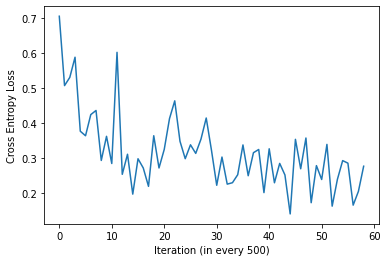

In [ ]:
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

170104016_exp_03_02

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 150
num_iters = 50000
input_dim = 28*28 # num_features = 784
num_hidden = 200
output_dim = 10
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
      
        self.linear_1 = nn.Linear(input_size, num_hidden)
       
        self.relu_1 = nn.ReLU()

        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
       
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(num_hidden, num_hidden)
      
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
 
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
 

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = 128)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
             
 
            # Print Loss
            iteration_loss.append(loss.item())
        
           
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.5764885544776917. Accuracy: 79.28571428571429
Iteration: 1000. Loss: 0.534240186214447. Accuracy: 82.43571428571428
Iteration: 1500. Loss: 0.4668486416339874. Accuracy: 83.57142857142857
Iteration: 2000. Loss: 0.26871800422668457. Accuracy: 86.57142857142857
Iteration: 2500. Loss: 0.34809836745262146. Accuracy: 86.86428571428571
Iteration: 3000. Loss: 0.37079334259033203. Accuracy: 85.86428571428571
Iteration: 3500. Loss: 0.26226896047592163. Accuracy: 86.85
Iteration: 4000. Loss: 0.3396276831626892. Accuracy: 86.35
Iteration: 4500. Loss: 0.5347943902015686. Accuracy: 87.64285714285714
Iteration: 5000. Loss: 0.2710442543029785. Accuracy: 86.97142857142858
Iteration: 5500. Loss: 0.2888990640640259. Accuracy: 88.80714285714286
Iteration: 6000. Loss: 0.26771214604377747. Accuracy: 87.49285714285715
Iteration: 6500. Loss: 0.29954174160957336. Accuracy: 86.74285714285715
Iteration: 7000. Loss: 0.2603972256183624. Accuracy: 88.77142857142857
Iteration: 7500. Loss: 0.2